In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
y = breast_cancer_wisconsin_original.data.targets 

X = X.drop(columns=['Bare_nuclei']) # this feature has missing values
feature_names = X.columns.tolist()

X = pd.DataFrame(X, columns=X.columns)

# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [2]:
X.shape

(699, 8)

In [3]:
unique_counts = {col: X[col].value_counts() for col in X.columns}

# Print the number of unique values and their counts for each feature
for feature, counts in unique_counts.items():
    print(f"Feature: {feature}")
    print(f"Number of unique values: {counts.shape[0]}")
    print(counts, "\n")

Feature: Clump_thickness
Number of unique values: 10
Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64 

Feature: Uniformity_of_cell_size
Number of unique values: 10
Uniformity_of_cell_size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64 

Feature: Uniformity_of_cell_shape
Number of unique values: 10
Uniformity_of_cell_shape
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: count, dtype: int64 

Feature: Marginal_adhesion
Number of unique values: 10
Marginal_adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64 

Feature: Single_epithelial_cell_size
Number of unique values: 10
Single_epithelial_cell_size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7

In [4]:
import numpy as np

In [5]:
grouped_data = []

# Group by 'Bland_chromatin' and process each group
for _, group in X.groupby('Bland_chromatin'):
    # Drop the Bland_chromatin' column and convert the group to a NumPy array
    group_data = group.drop(columns=['Bland_chromatin']).to_numpy()

    # Append the group as a NumPy array into the grouped_data list
    grouped_data.append(group_data)

In [6]:
grouped_data

[array([[2, 1, 1, ..., 2, 1, 5],
        [1, 1, 3, ..., 2, 1, 1],
        [3, 1, 1, ..., 2, 1, 1],
        ...,
        [3, 1, 1, ..., 2, 1, 1],
        [3, 1, 1, ..., 3, 1, 1],
        [2, 1, 1, ..., 2, 1, 1]], shape=(152, 7)),
 array([[4, 2, 1, ..., 2, 1, 1],
        [2, 1, 1, ..., 2, 1, 1],
        [4, 1, 1, ..., 2, 1, 1],
        ...,
        [1, 1, 2, ..., 2, 1, 1],
        [3, 1, 1, ..., 2, 3, 1],
        [3, 1, 1, ..., 2, 1, 2]], shape=(166, 7)),
 array([[5, 1, 1, ..., 2, 1, 1],
        [5, 4, 4, ..., 7, 2, 1],
        [3, 1, 1, ..., 2, 1, 1],
        ...,
        [3, 2, 1, ..., 2, 1, 1],
        [2, 1, 1, ..., 2, 1, 1],
        [5, 1, 1, ..., 2, 2, 1]], shape=(165, 7)),
 array([[ 5,  3,  3,  3,  2,  4,  1],
        [ 7,  4,  6,  4,  6,  3,  1],
        [10,  7,  7,  6,  4,  1,  2],
        [ 3,  7,  7,  4,  4,  8,  1],
        [10,  3,  6,  2,  3, 10,  2],
        [ 5,  3,  5,  5,  3, 10,  1],
        [10,  4,  2,  1,  3,  3, 10],
        [ 5,  3,  4,  1,  8,  9,  1],
        [

In [7]:
datasets = grouped_data

In [8]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier

In [9]:
classifier = OneClassSMMClassifier(nu=0.2)

In [10]:
classifier.fit(datasets)

Best gamma found.

kappa matrix calculated.

Found the alphas.



In [11]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa...

calculatin rho
[1.10392084 1.10391956 1.10391966]


In [12]:
decision

array([ 8.20574076e-07,  8.66588302e-03,  1.10755097e-01,  1.70098850e-01,
        1.60837691e-01,  3.31127126e-02,  1.75014571e-01,  3.73163899e-03,
       -4.63874710e-07, -3.56699367e-07])

In [ ]:
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.])

In [14]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[8, 9]

In [15]:
feature_names.remove("Bland_chromatin")

In [16]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
Parallel projections: 100%|██████████| 127/127 [00:00<00:00, 185.11it/s]


In [17]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [18]:
shapley_values.T

tensor([[ 0.0025,  0.0021,  0.0025,  0.0079,  0.0044, -0.0101,  0.0017],
        [ 0.0070,  0.0042,  0.0042,  0.0056,  0.0004,  0.0005,  0.0019],
        [ 0.0121,  0.0096,  0.0093,  0.0104,  0.0081,  0.0225,  0.0093],
        [ 0.0175,  0.0373,  0.0302,  0.0240,  0.0241,  0.0230,  0.0161],
        [ 0.0151,  0.0236,  0.0227,  0.0153,  0.0219,  0.0438,  0.0206],
        [ 0.0029,  0.0093,  0.0119,  0.0006,  0.0099,  0.0037, -0.0023],
        [ 0.0150,  0.0265,  0.0203,  0.0217,  0.0191,  0.0354,  0.0338],
        [ 0.0071, -0.0019, -0.0047,  0.0044,  0.0063, -0.0171,  0.0108],
        [ 0.0064, -0.0008,  0.0080,  0.0044, -0.0020, -0.0117, -0.0034],
        [ 0.0105, -0.0149, -0.0091,  0.0022,  0.0027,  0.0031,  0.0050]])

/home/swathi/micromamba/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


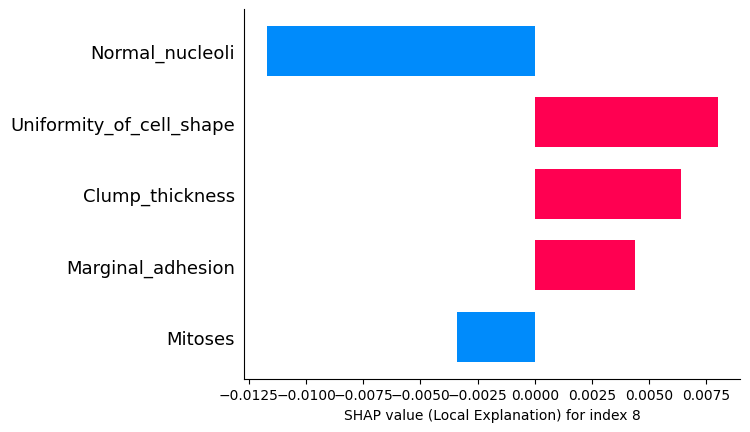

In [19]:
from src.utils.visualisation.deterministic_values import local_bar_plot, global_bar_plot
local_bar_plot(shapley_values, 8, feature_names=feature_names)

In [20]:
# bar_plot(mean_stochastic_shapley_values.T[8], datasets[8], feature_names=feature_names)

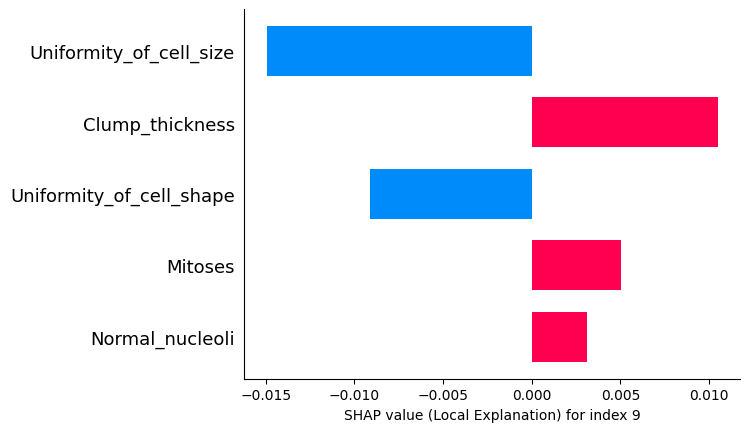

In [21]:
local_bar_plot(shapley_values, 9, feature_names=feature_names)

/tmp/ipykernel_1588795/1214104310.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)
/home/swathi/OCSVM-SHAP/src/utils/visualisation/deterministic_values.py:12: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3725.)
  shap.bar_plot(shapley_values.T, show=False, max_display=5, **kwargs)


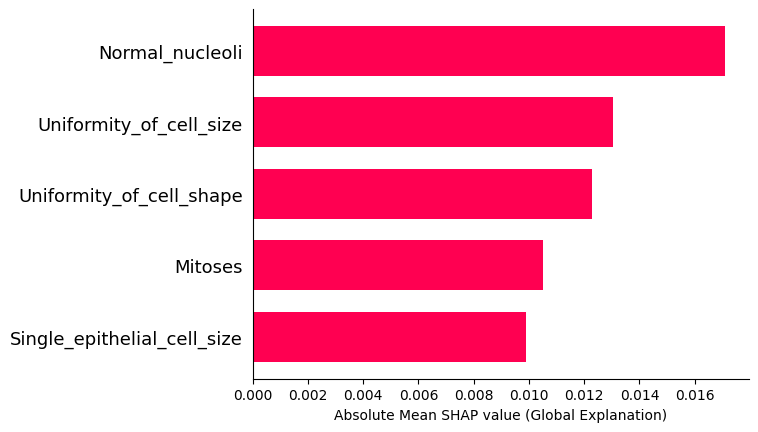

In [22]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values, feature_names=feature_names)

/tmp/ipykernel_1588795/1469941899.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1)


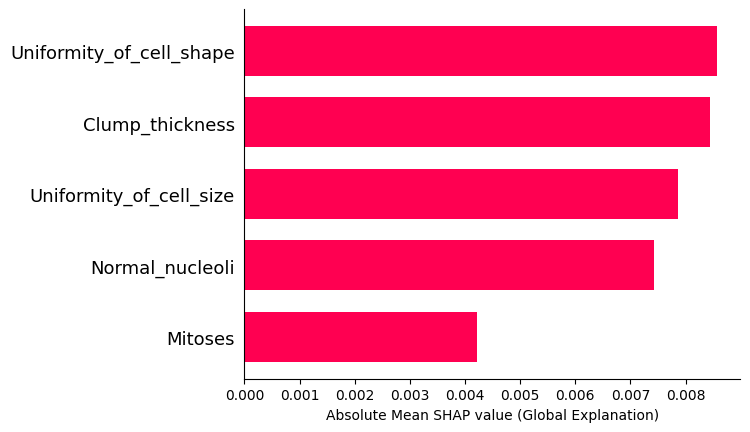

In [23]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier, feature_names=feature_names)

In [24]:
import matplotlib.pyplot as plt

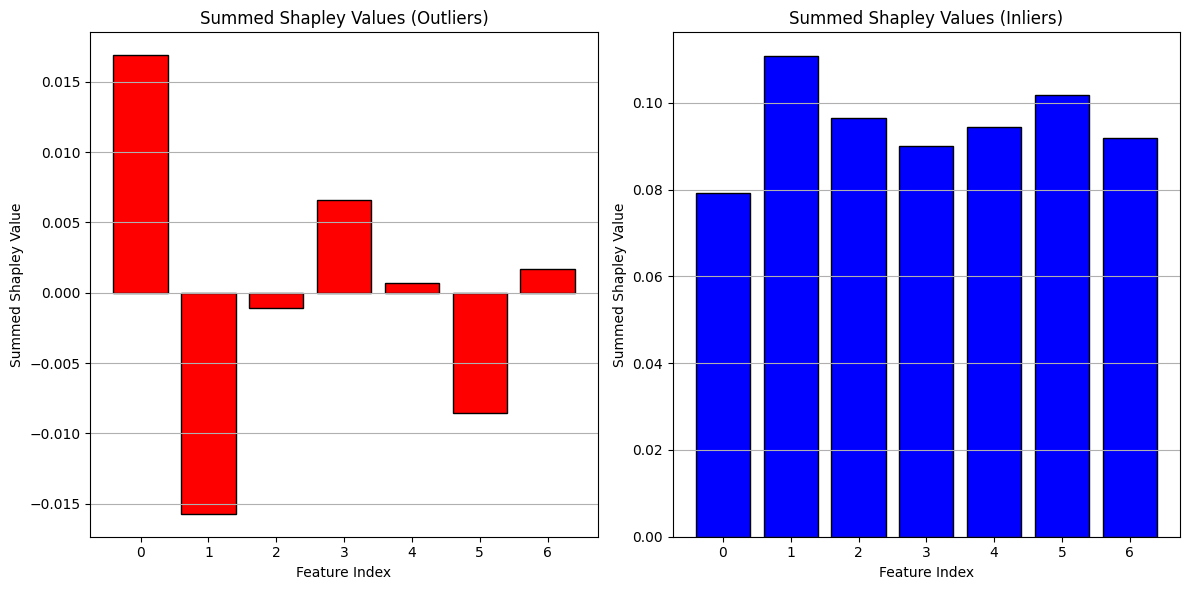

In [25]:
inlier_indices = [i for i in range(shapley_values.shape[1]) if i not in outlier_indices]

summed_outlier_shapley = shapley_values[:, outlier_indices].sum(dim=1).numpy()
summed_inlier_shapley = shapley_values[:, inlier_indices].sum(dim=1).numpy()

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outlier Shapley Values
ax[0].bar(range(len(summed_outlier_shapley)), summed_outlier_shapley, color='red', edgecolor='black')
ax[0].set_title('Summed Shapley Values (Outliers)')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

# Inlier Shapley Values
ax[1].bar(range(len(summed_inlier_shapley)), summed_inlier_shapley, color='blue', edgecolor='black')
ax[1].set_title('Summed Shapley Values (Inliers)')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

The inliers seem to approximately have an equal contributions from all feature towards its decision, but for outliers, some feature contribute more towards making them outleirs. 


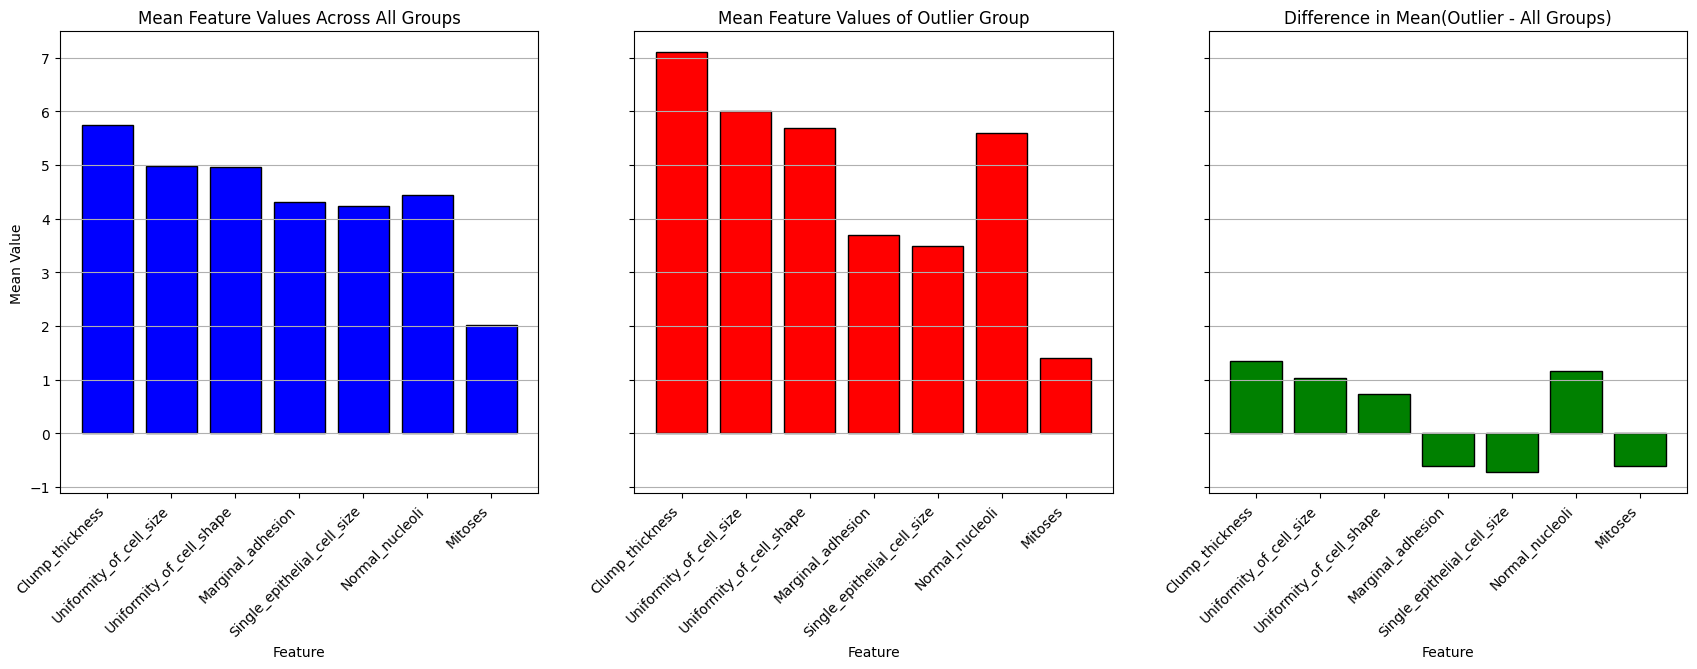

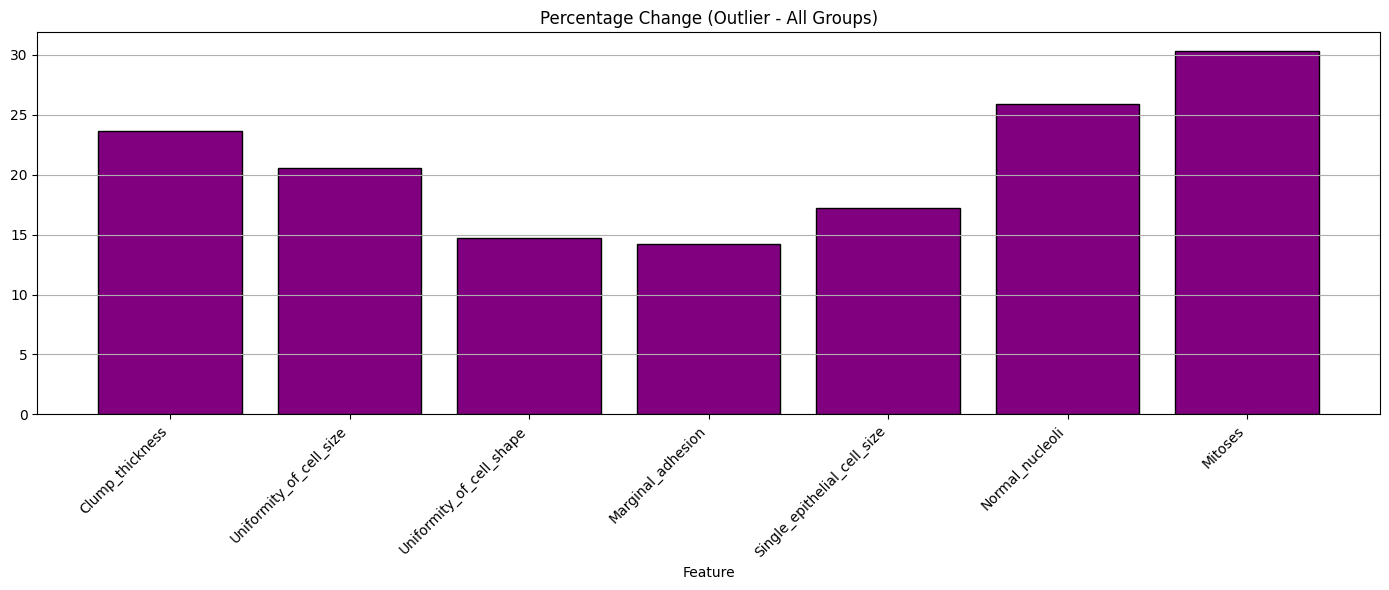

In [26]:
mean_all_groups = np.mean([np.mean(group, axis=0) for i, group in enumerate(datasets) if i != 8], axis=0)
std_deviation_all_groups = np.std([np.mean(group, axis=0) for i, group in enumerate(datasets) if i != 8], axis=0)
# Compute mean feature values for the outlier group
mean_outlier_group = np.mean(datasets[5], axis=0)
std_deviation_outlier_group = np.std(datasets[5], axis=0)

avg_std = (std_deviation_outlier_group+std_deviation_all_groups)/2
# Compute the delta between the two (outlier vs all groups)
difference_values = mean_outlier_group - mean_all_groups

percentage_change = abs((mean_outlier_group - mean_all_groups) / mean_all_groups) * 100

# Feature names for labeling
num_features = len(mean_all_groups)
x_labels = feature_names[:num_features]  # Adjust based on the number of features

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Mean feature values for all groups (excluding outlier)
ax[0].bar(range(num_features), mean_all_groups, color='blue', edgecolor='black')
ax[0].set_xticks(range(num_features))
ax[0].set_xticklabels(x_labels, rotation=45, ha='right')
ax[0].set_title('Mean Feature Values Across All Groups')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Mean Value')
ax[0].grid(axis='y')

# Mean feature values for the outlier group
ax[1].bar(range(num_features), mean_outlier_group, color='red', edgecolor='black')
ax[1].set_xticks(range(num_features))
ax[1].set_xticklabels(x_labels, rotation=45, ha='right')
ax[1].set_title('Mean Feature Values of Outlier Group')
ax[1].set_xlabel('Feature')
ax[1].grid(axis='y')

# Delta values (difference between the outlier group and all groups)
ax[2].bar(range(num_features), difference_values, color='green', edgecolor='black')
ax[2].set_xticks(range(num_features))
ax[2].set_xticklabels(x_labels, rotation=45, ha='right')
ax[2].set_title('Difference in Mean(Outlier - All Groups)')
ax[2].set_xlabel('Feature')
ax[2].grid(axis='y')

# ax[3].bar(range(num_features), percentage_change, color='purple', edgecolor='black')
# ax[3].set_xticks(range(num_features))
# ax[3].set_xticklabels(x_labels, rotation=45, ha='right')
# ax[3].set_title('Percentage Change (Outlier - All Groups)')
# ax[3].set_xlabel('Feature')
# ax[3].grid(axis='y')

fig, ax2 = plt.subplots(figsize=(14, 6))  # New figure for the percentage change plot
ax2.bar(range(num_features), percentage_change, color='purple', edgecolor='black')
ax2.set_xticks(range(num_features))
ax2.set_xticklabels(x_labels, rotation=45, ha='right')
ax2.set_title('Percentage Change (Outlier - All Groups)')
ax2.set_xlabel('Feature')
ax2.grid(axis='y')

plt.tight_layout()
plt.show()

Normal nucleoli has a high difference in mean values 

## Add an artificial feature

In [27]:
X_scaled_df = pd.DataFrame(X, columns=X.columns)
grouped_data = []

for i, (_, group) in enumerate(X_scaled_df.groupby('Normal_nucleoli')):
    group_data = group.drop(columns=['Normal_nucleoli']).to_numpy()
    artificial_feature = np.ones((group_data.shape[0],1))  # Default value = 1
    if i == 0 : 
        artificial_feature.fill(3)
    
    group_data = np.hstack((group_data, artificial_feature))  # Append feature
    grouped_data.append(group_data)

In [28]:
feature_names.append('artificial_feature')

In [29]:
datasets = grouped_data

In [30]:
datasets

[array([[5., 1., 1., ..., 3., 1., 3.],
        [3., 1., 1., ..., 3., 1., 3.],
        [4., 1., 1., ..., 3., 1., 3.],
        ...,
        [3., 1., 1., ..., 2., 2., 3.],
        [3., 1., 1., ..., 1., 1., 3.],
        [2., 1., 1., ..., 1., 1., 3.]], shape=(443, 8)),
 array([[ 5.,  4.,  4.,  5.,  7.,  3.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  2.,  3.,  1.,  1.],
        [ 1.,  3.,  3.,  2.,  2.,  7.,  1.,  1.],
        [10.,  6.,  4.,  1.,  3.,  3.,  3.,  1.],
        [ 1.,  1.,  2.,  1.,  2.,  4.,  1.,  1.],
        [ 7.,  3.,  4.,  4.,  3.,  3.,  7.,  1.],
        [ 8.,  3.,  3.,  1.,  2.,  3.,  1.,  1.],
        [ 3.,  1.,  1.,  1.,  2.,  2.,  1.,  1.],
        [ 4.,  1.,  1.,  1.,  2.,  3.,  1.,  1.],
        [ 4.,  1.,  1.,  1.,  2.,  3.,  1.,  1.],
        [ 5.,  1.,  4.,  1.,  2.,  3.,  1.,  1.],
        [ 3.,  1.,  1.,  1.,  2.,  3.,  1.,  1.],
        [ 5.,  2.,  2.,  2.,  2.,  2.,  1.,  1.],
        [ 4.,  1.,  1.,  1.,  3.,  2.,  1.,  1.],
        [ 3.,  1.,  1.,  4.,  3.,  

In [31]:
feature_names

['Clump_thickness',
 'Uniformity_of_cell_size',
 'Uniformity_of_cell_shape',
 'Marginal_adhesion',
 'Single_epithelial_cell_size',
 'Normal_nucleoli',
 'Mitoses',
 'artificial_feature']

In [32]:
classifier = OneClassSMMClassifier(nu=0.2)

In [33]:
classifier.fit(datasets)

Best gamma found.

kappa matrix calculated.

Found the alphas.



In [34]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa...

calculatin rho
[1.21287366 1.2229757  1.21293913]


In [35]:
decision

array([-0.00338917,  0.07668281,  0.15263916,  0.05902914,  0.07260917,
        0.12815384,  0.00671287,  0.05145581,  0.03300362, -0.0033237 ])

In [36]:
y_pred

array([-1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.])

In [37]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[0, 9]

In [38]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**len(feature_names))

/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: divide by zero encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in cast
  set_to_1 = np.floor(np.log2(rest)).astype(int)
/home/swathi/OCSVM-SHAP/src/utils/shapley_procedure/coalitions.py:18: RuntimeWarning: invalid value encountered in log2
  set_to_1 = np.floor(np.log2(rest)).astype(int)
Parallel projections: 100%|██████████| 255/255 [00:02<00:00, 111.14it/s]


In [39]:
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

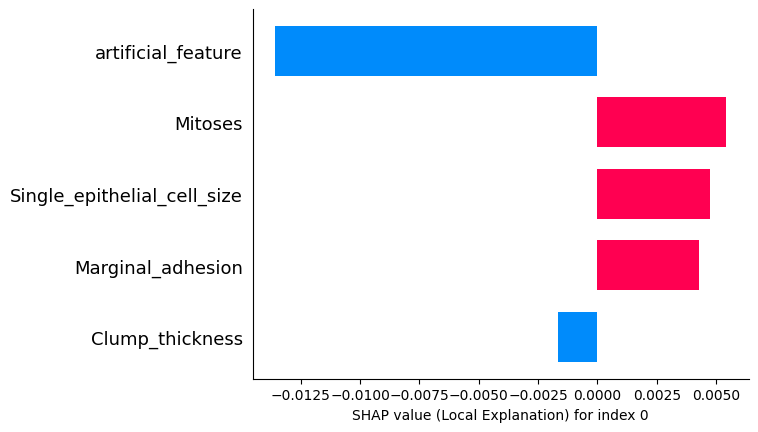

In [40]:
from src.utils.visualisation.deterministic_values import local_bar_plot, global_bar_plot
local_bar_plot(shapley_values, 0, feature_names=feature_names)

Since this group now has an abnormal artificial feature added, the feature attributions change accordingly. Now the artificial feature is the one more responsible for the outcome and the older remaining features just shift a little to a lower value. (some positive contributions becomes negative)

The artificial_feature has the highest shapley value for the altered group as expected

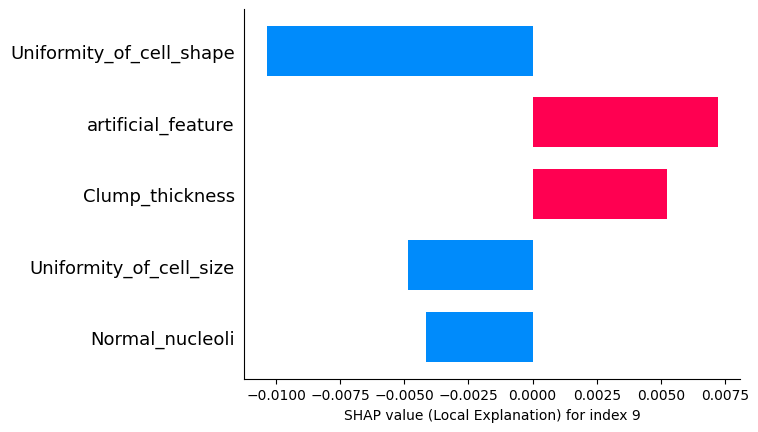

In [41]:
local_bar_plot(shapley_values, 9, feature_names=feature_names)

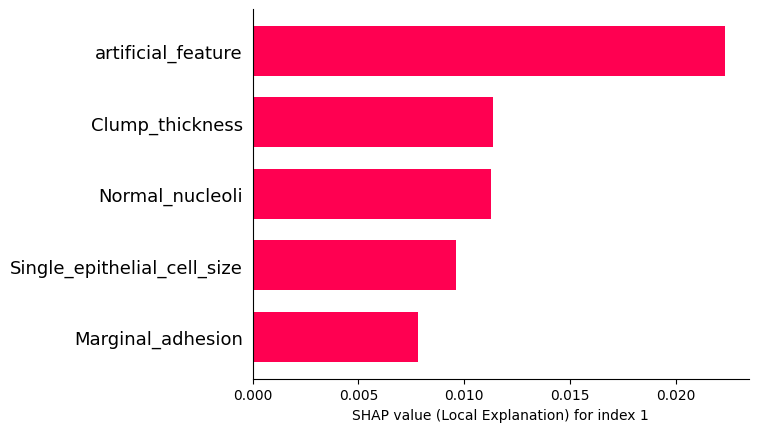

In [45]:
local_bar_plot(shapley_values, 1, feature_names=feature_names)

The features contributing to this group being an outleir almost remain the same and we can see that artificial_feature is again contributing negataively. 

/tmp/ipykernel_1588795/1214104310.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)


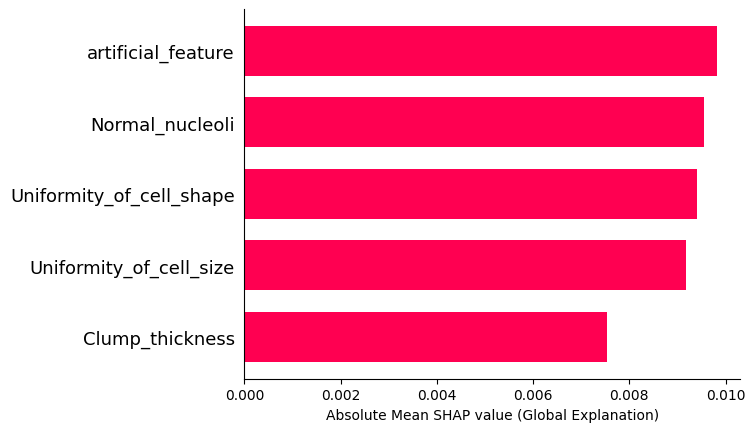

In [42]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values, feature_names=feature_names)

/tmp/ipykernel_1588795/1469941899.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1)


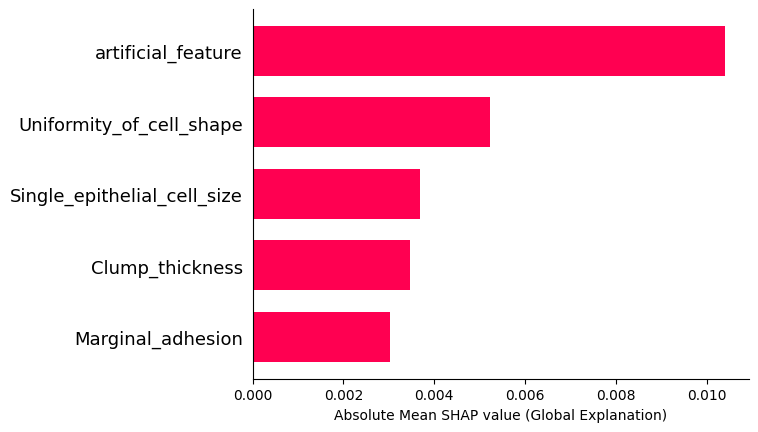

In [43]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier, feature_names=feature_names)

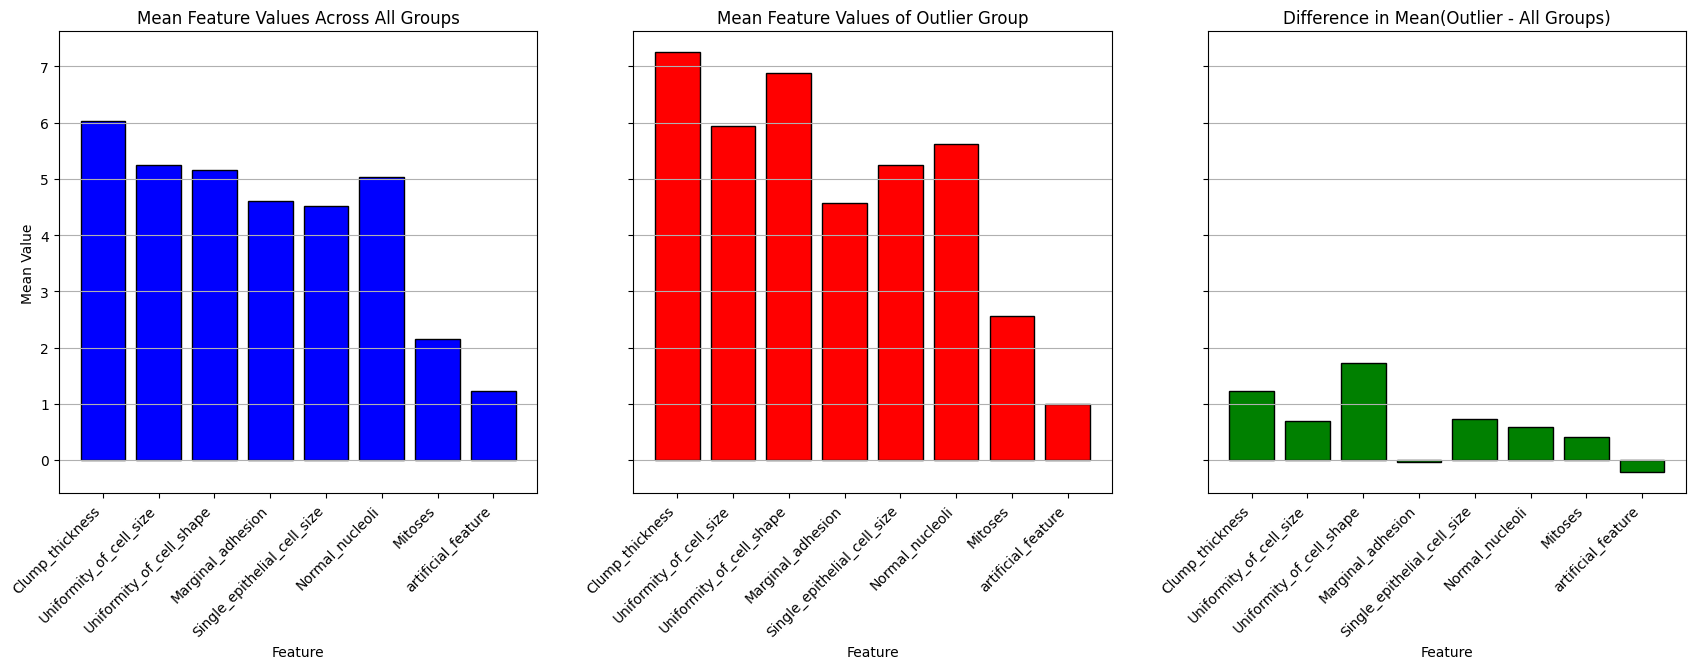

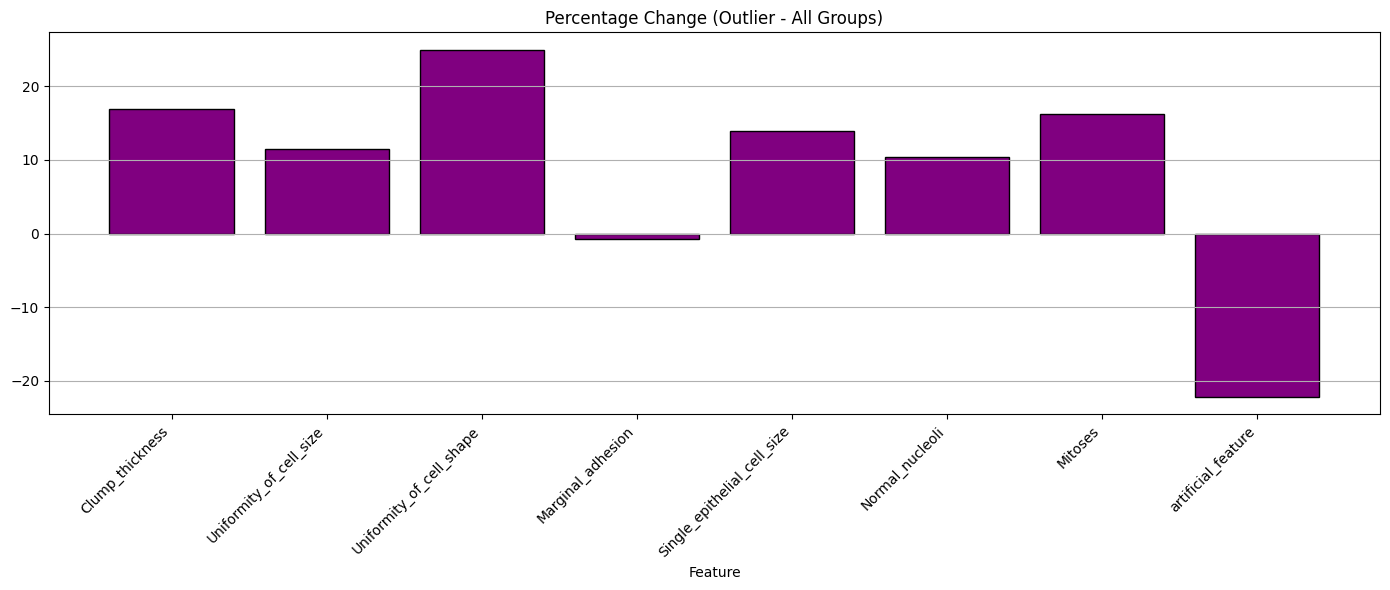

In [44]:
mean_all_groups = np.mean([np.mean(group, axis=0) for i, group in enumerate(datasets) if i != 8], axis=0)

# Compute mean feature values for the outlier group
mean_outlier_group = np.mean(datasets[8], axis=0)

# Compute the delta between the two (outlier vs all groups)
difference_values = mean_outlier_group - mean_all_groups

percentage_change = ((mean_outlier_group - mean_all_groups) / mean_outlier_group) * 100

# Feature names for labeling
num_features = len(mean_all_groups)
x_labels = feature_names[:num_features]  # Adjust based on the number of features

# Plot histograms
fig, ax = plt.subplots(1, 3, figsize=(21, 6), sharey=True)

# Mean feature values for all groups (excluding outlier)
ax[0].bar(range(num_features), mean_all_groups, color='blue', edgecolor='black')
ax[0].set_xticks(range(num_features))
ax[0].set_xticklabels(x_labels, rotation=45, ha='right')
ax[0].set_title('Mean Feature Values Across All Groups')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Mean Value')
ax[0].grid(axis='y')

# Mean feature values for the outlier group
ax[1].bar(range(num_features), mean_outlier_group, color='red', edgecolor='black')
ax[1].set_xticks(range(num_features))
ax[1].set_xticklabels(x_labels, rotation=45, ha='right')
ax[1].set_title('Mean Feature Values of Outlier Group')
ax[1].set_xlabel('Feature')
ax[1].grid(axis='y')

# Delta values (difference between the outlier group and all groups)
ax[2].bar(range(num_features), difference_values, color='green', edgecolor='black')
ax[2].set_xticks(range(num_features))
ax[2].set_xticklabels(x_labels, rotation=45, ha='right')
ax[2].set_title('Difference in Mean(Outlier - All Groups)')
ax[2].set_xlabel('Feature')
ax[2].grid(axis='y')

# ax[3].bar(range(num_features), percentage_change, color='purple', edgecolor='black')
# ax[3].set_xticks(range(num_features))
# ax[3].set_xticklabels(x_labels, rotation=45, ha='right')
# ax[3].set_title('Percentage Change (Outlier - All Groups)')
# ax[3].set_xlabel('Feature')
# ax[3].grid(axis='y')

fig, ax2 = plt.subplots(figsize=(14, 6))  # New figure for the percentage change plot
ax2.bar(range(num_features), percentage_change, color='purple', edgecolor='black')
ax2.set_xticks(range(num_features))
ax2.set_xticklabels(x_labels, rotation=45, ha='right')
ax2.set_title('Percentage Change (Outlier - All Groups)')
ax2.set_xlabel('Feature')
ax2.grid(axis='y')

plt.tight_layout()
plt.show()